# Model Evaluation and Data preprocessing

## 1. 📊 Data Preprocessing in Data Science

## 🔍 Why is Data Preprocessing Important?
- Clean Data → Removes noise, handles missing values, and fixes inconsistencies.
- Standardization & Normalization → Ensures features are on the same scale.
- Better Model Accuracy → Reduces bias and variance in predictions.
- Faster Training → Optimized data speeds up algorithm convergence.
- Reliable Insights → Avoids misleading results due to unprocessed data.

---

## 🌍 Where is Data Preprocessing Used?
- Healthcare → Cleaning patient records before diagnosis prediction.
- Finance → Preparing stock market data for forecasting.
- E-commerce → Organizing customer purchase data for recommendations.
- Social Media → Removing duplicates/spam from user-generated content.
- AI in Self-driving Cars → Filtering sensor noise for accurate decision-making.


### Steps in data Preprocessing

First 5 rows:
     x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None

--- Null Values ---
x    0
y    0
dtype: int64

--- Statistical Summary ---
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


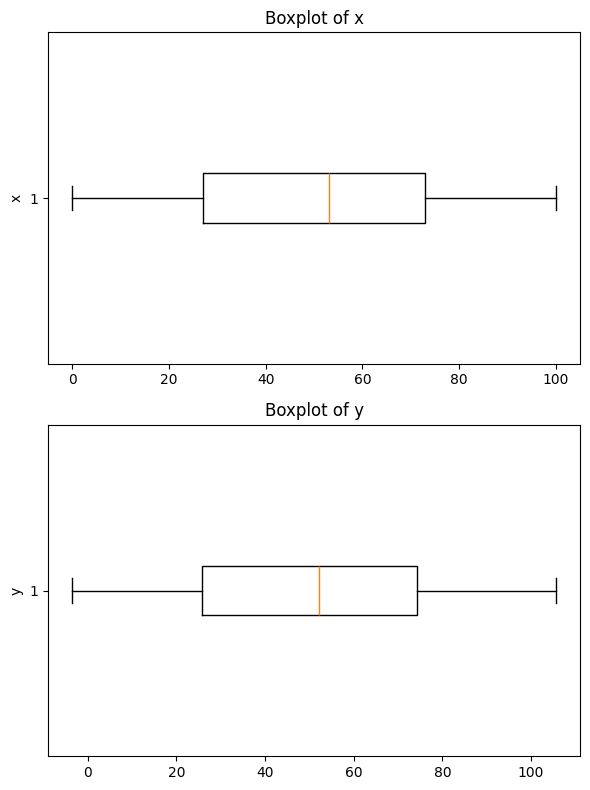


--- Data shape after outlier removal ---
(300, 2)


In [23]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 2: Load dataset
df = pd.read_csv("train.csv")
print("First 5 rows:\n", df.head())

# Step 3: Dataset info
print("\n--- Dataset Info ---")
print(df.info())

# Step 4: Check for null values
print("\n--- Null Values ---")
print(df.isnull().sum())

# Step 5: Statistical summary
print("\n--- Statistical Summary ---")
print(df.describe())

# Step 6: Outlier detection using Boxplots
fig, axs = plt.subplots(len(df.columns), 1, figsize=(6, 4 * len(df.columns)))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#  Step 7: Outlier removal (IQR method)
def remove_outliers(data, col, factor=1.5):
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

clean_data = df.copy()
for col in df.columns:
    clean_data = remove_outliers(clean_data, col)

print("\n--- Data shape after outlier removal ---")
print(clean_data.shape)

## Sacling

### **1. StandardScaler**
- **What:** Scales features to have mean = 0 and standard deviation = 1 (Standard Normal Distribution).  
- **Where to use:**  
  - Data is (or should be) normally distributed.
  - Algorithms like Logistic Regression, SVM, Neural Networks.
- **Why:**  
  - Handles features with different units.
  - Centers data for faster convergence.
- **Advantages:**  
  - Standardizes variability across features.
- **Disadvantages:**  
  - Sensitive to outliers — they can skew the mean/std.


--- Normalized Data Sample ---
[[0.77       0.76327937]
 [0.21       0.24431717]
 [0.22       0.26661672]
 [0.2        0.19553756]
 [0.36       0.41553149]]


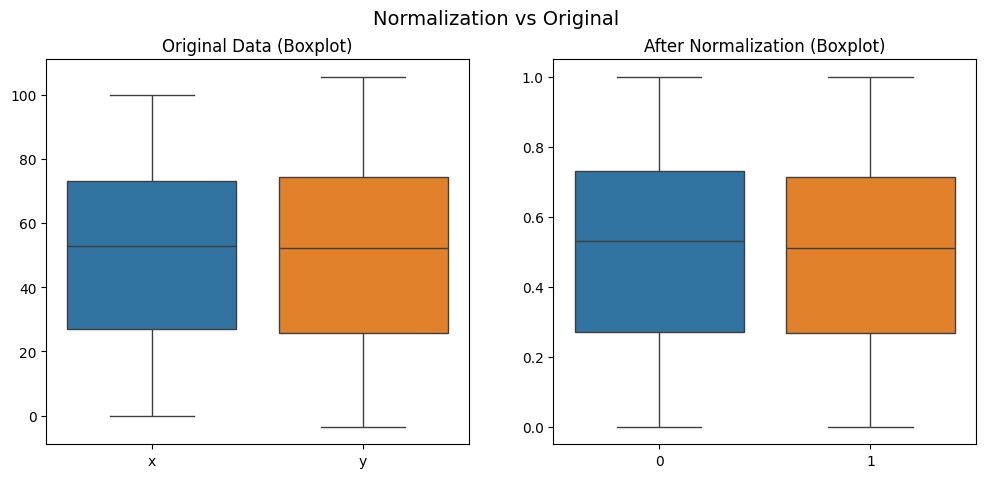

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 8: Normalization
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(clean_data)
print("\n--- Normalized Data Sample ---")
print(X_normalized[:5])

# Visualization of Normalization
plt.figure(figsize=(12, 5))
plt.suptitle("Normalization vs Original", fontsize=14)

plt.subplot(1, 2, 1)
sns.boxplot(data=clean_data)
plt.title("Original Data (Boxplot)")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalized)
plt.title("After Normalization (Boxplot)")
plt.show()

### **2. MinMaxScaler**
- **What:** Scales all features to a fixed range (default \([0, 1]\), can be \([-1, 1]\)).
- **Where to use:**  
  - Data is not normally distributed.
  - Distance-based algorithms like KNN, K-Means, Neural Networks.
- **Why:**  
  - Keeps original data distribution.
  - Ensures features have the same scale.
- **Advantages:**  
  - Simple, keeps data shape intact.
- **Disadvantages:**  
  - Sensitive to outliers.
  - Fixed range can cause compression if new extremes appear.


--- Standardized Data Sample ---
[[ 0.91589319  0.98439558]
 [-1.05200623 -0.9657094 ]
 [-1.01686517 -0.88191435]
 [-1.08714729 -1.14900861]
 [-0.52489032 -0.32233713]]


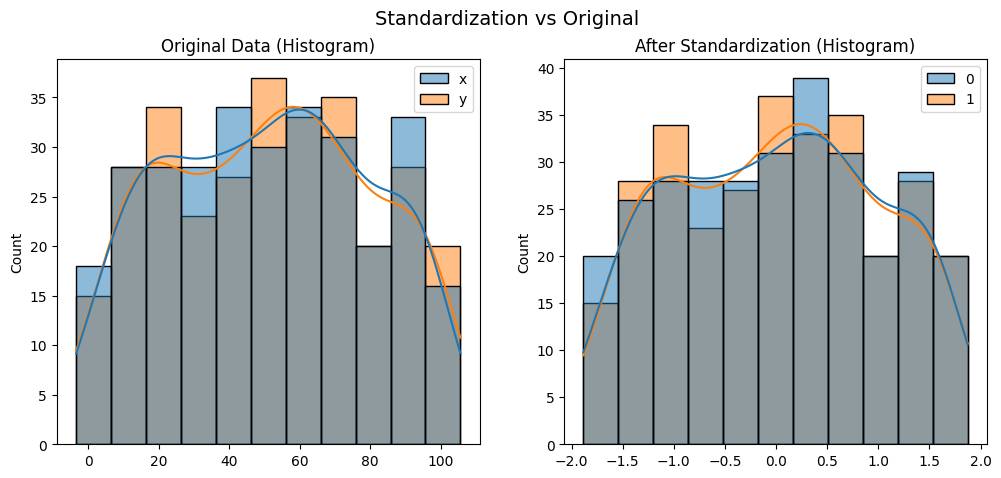

In [25]:
#  Step 9: Standardization
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(clean_data)
print("\n--- Standardized Data Sample ---")
print(X_standardized[:5])

#  Visualization of Standardization
plt.figure(figsize=(12, 5))
plt.suptitle("Standardization vs Original", fontsize=14)

plt.subplot(1, 2, 1)
sns.histplot(data=clean_data, kde=True)
plt.title("Original Data (Histogram)")

plt.subplot(1, 2, 2)
sns.histplot(data=X_standardized, kde=True)
plt.title("After Standardization (Histogram)")
plt.show()


## One-hot Encoding

## 🧐 What is it?
One-hot encoding is a technique to convert categorical data into a numerical format that machine learning models can understand.  
It creates binary columns (0/1) for each unique category.

---

## 💡 Why use it?
- **Machine learning algorithms need numbers** — they can’t directly work with text categories.  
- **Avoids ordinal bias** — unlike label encoding, one-hot encoding doesn’t assume one category is “greater” than another.  
- **Preserves information** — no loss of detail from categorical values.

---

## 📍 Where is it used?
- **Categorical features** like `"Color"`, `"City"`, `"Gender"`.  
- **Data preprocessing** before feeding data into ML models such as logistic regression, decision trees, neural networks.  
- **Feature engineering** when you want to represent categories in a machine-friendly way.

---

## 🧩 Example:
Original data:

| Color |
|-------|
| Red   |
| Blue  |
| Green |
| Red   |

After One-Hot Encoding:

| Color_Blue | Color_Green | Color_Red |
|------------|-------------|-----------|
| 0          | 0           | 1         |
| 1          | 0           | 0         |
| 0          | 1           | 0         |
| 0          | 0           | 1         |


In [28]:
## One hot encoding using Scikit Learn 
## import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
df = pd.DataFrame(data)
print(f"Employee data : \n{df}")

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


## Train Test Split

## ❓ What is Train-Test Split?
Train-test split divides a dataset into two parts:  
1.  **Training set** – used to train the model.  
2.  **Testing set** – used to evaluate the model on unseen data.  

---

## 🎯 Why is it Used?
- **Model Validation:** Test performance on new, unseen data.  
- **Prevent Overfitting:** Avoids memorization of training data.  
- **Performance Evaluation:** Gives unbiased accuracy estimates.

---

## 🌍 Where is it Used?
- In **supervised ML tasks**: regression & classification.  
- Before training models to ensure proper evaluation.

### Train-Test Split on a Sample DataFrame

In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample DataFrame
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [5, 4, 3, 2, 1],
        'target': [0, 1, 0, 1, 0]}
df = pd.DataFrame(data)

# Features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Testing Labels:\n", y_test)

Training Features:
    feature1  feature2
4         5         1
2         3         3
0         1         5
3         4         2
Testing Features:
    feature1  feature2
1         2         4
Training Labels:
 4    0
2    0
0    0
3    1
Name: target, dtype: int64
Testing Labels:
 1    1
Name: target, dtype: int64


### Train-Test Split on a CSV Dataset for Machine Learning

In [41]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# read the dataset
df = pd.read_csv('train.csv')

# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [42]:
X_train

,x
74,15
270,55
90,67
229,14
164,49
...,...
251,95
192,77
117,90
47,68


In [45]:
X_test

,x
208,67
188,27
12,96
221,100
239,28
136,65
230,37
206,40
52,52
108,89


# Evaluation metrics

##  1. Mean Absolute Error (MAE)
**What:** Measures the average absolute difference between the actual and predicted values.  
**Why:** Simple to understand and interpret; less sensitive to outliers.  
**Where:** Used in regression problems to get an idea of the average prediction error.

In [53]:
from sklearn.metrics import mean_absolute_error

true_values = [2.5, 3.7, 1.8, 4.0, 5.2]
predicted_values = [2.1, 3.9, 1.7, 3.8, 5.0]

mae = mean_absolute_error(true_values, predicted_values)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.22000000000000003


##  R-squared (R²) Score
**What:** Measures the proportion of variance in the dependent variable explained by the model.  
**Why:** Indicates how well the model captures the variability of the target; a higher R² means a better fit.  
**Where:** Used in regression problems to assess overall goodness of fit.  
**How:** Compare the sum of squared residuals (errors) to the total variance.

In [54]:
from sklearn.metrics import r2_score

true_values = [2.5, 3.7, 1.8, 4.0, 5.2]
predicted_values = [2.1, 3.9, 1.7, 3.8, 5.0]

r2 = r2_score(true_values, predicted_values)
print("R-squared (R^2) Score:", r2)


R-squared (R^2) Score: 0.9588769143505389


##  What is MSE(Mean Squared Error)?
Mean Squared Error (MSE) measures the average squared difference between the actual values and the predicted values of a regression model.

---
##  Why is it Used?
- Penalizes larger errors more than Mean Absolute Error (MAE).  
- Helps to identify models with significant deviations from true values.  
- Provides a single quantitative measure of model performance.

---
##  Where is it Used?
- In regression problems to evaluate the overall prediction accuracy of a model.  
- Used during model selection and tuning to compare different regression algorithms.

In [98]:
from sklearn.metrics import mean_squared_error

true_values = [2.5, 3.7, 1.8, 4.0, 5.2]
predicted_values = [2.1, 3.9, 1.7, 3.8, 5.0]

mse = mean_squared_error(true_values, predicted_values)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.057999999999999996


## Classification: Accuracy, Precision, Recall, F1-score, ROC-AUC

In [150]:
# =========================
# Import libraries
# =========================
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# =========================
# 1. Load dataset
# =========================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# =========================
# 2. Preprocessing
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 3. Train Logistic Regression
# =========================
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# =========================
# 4. Predictions
# =========================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# =========================
# 5. Accuracy
# =========================
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", accuracy)

# =========================
# 6. Precision
# =========================
precision = precision_score(y_test, y_pred)
print(" Precision:", precision)

# =========================
# 7. Recall
# =========================
recall = recall_score(y_test, y_pred)
print(" Recall:", recall)

# =========================
# 8. F1-score
# =========================
f1 = f1_score(y_test, y_pred)
print(" F1-score:", f1)

# =========================
# 9. ROC-AUC
# =========================
roc_auc = roc_auc_score(y_test, y_prob)
print(" ROC-AUC:", roc_auc)


 Accuracy: 0.9824561403508771
 Precision: 0.9861111111111112
 Recall: 0.9861111111111112
 F1-score: 0.9861111111111112
 ROC-AUC: 0.9953703703703703


## 🔁 Cross-Validation in Machine Learning


## 📘 What is Cross-Validation?

Cross-validation is a statistical technique used to assess how well a machine learning model generalizes to unseen data. It involves partitioning the dataset into multiple subsets, training the model on some subsets, and testing it on the remaining ones. This process is repeated several times, and the results are averaged to provide a more reliable estimate of model performance.

## 🎯 Why Use Cross-Validation?

- **Prevents Overfitting**: By training and testing the model on different subsets, cross-validation helps ensure that the model doesn't memorize the training data but generalizes well to new, unseen data.
  
- **Provides Robust Evaluation**: Averaging performance metrics over multiple folds reduces the variance associated with a single train-test split, leading to a more reliable estimate of model performance.

- **Maximizes Data Utilization**: Especially useful when dealing with limited data, as each data point gets a chance to be in the test set, making full use of available data.

## 🧩 How Does Cross-Validation Work?

1. **Split the Data**: Divide the dataset into 'k' equal-sized subsets or folds.
   
2. **Iterative Training and Testing**:
   - For each fold:
     - Treat it as the test set.
     - Combine the remaining k-1 folds to form the training set.
     - Train the model on the training set and evaluate it on the test set.
   
3. **Average the Results**: After completing the iterations, calculate the average of the performance metrics (e.g., accuracy, F1 score) to get a final evaluation score.



In [151]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [152]:
iris = load_iris()
X, y = iris.data, iris.target

In [153]:
svm_classifier = SVC(kernel='linear')

In [154]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [155]:
cross_val_results = cross_val_score(svm_classifier, X, y, cv=kf)

In [156]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 100.00%
  Fold 2: 100.00%
  Fold 3: 96.67%
  Fold 4: 93.33%
  Fold 5: 96.67%
Mean Accuracy: 97.33%


#  Breast Cancer Dataset (`sklearn.datasets.load_breast_cancer`)

---

## 📘 What is it?
`load_breast_cancer` is a preloaded dataset in Scikit-Learn containing features computed from breast cancer tumors.  
- Type: Binary classification dataset  
- Labels: Malignant (cancerous) or Benign (non-cancerous)  

---

## 🎯 Why is it used?
- To practice classification algorithms like Logistic Regression, Random Forest, SVM, etc.  
- To evaluate model performance on a real-world medical dataset.  
- Ideal for learning preprocessing, feature selection, and evaluation metrics (e.g., confusion matrix, ROC curve).

---

## 🧩 Where is it used?
- In machine learning tutorials or experiments for binary classification.  
- Useful for hands-on exercises with Scikit-Learn.  
- Often used in academics and training because it is clean, labeled, and small enough to run quickly.

# Implement confusion matrix 

In [157]:
## 📦 Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [158]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_proba = model.predict_proba(X_test)[:, 1]  
y_pred = model.predict(X_test)                     


In [160]:
# Initialize counts
TP = FP = TN = FN = 0

for true, pred in zip(y_test, y_pred):
    if true == 1 and pred == 1:
        TP += 1
    elif true == 0 and pred == 1:
        FP += 1
    elif true == 0 and pred == 0:
        TN += 1
    elif true == 1 and pred == 0:
        FN += 1

# Create confusion matrix
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[39  4]
 [ 1 70]]


# ROC curve manually

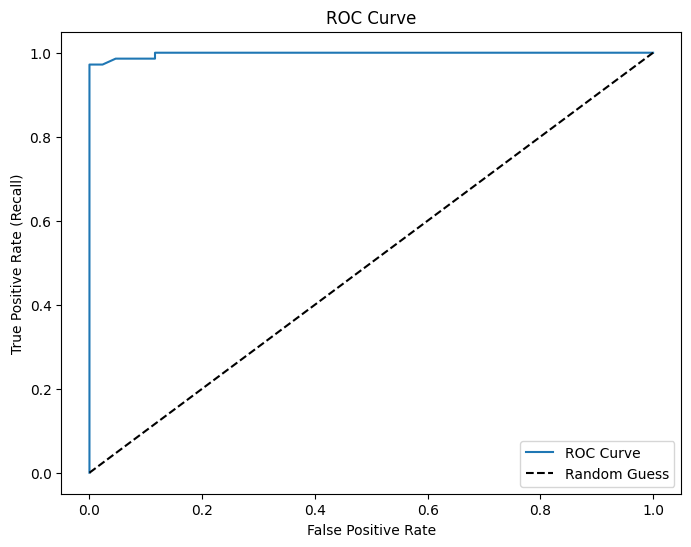

In [161]:
# Sort probabilities and initialize lists
thresholds = np.linspace(0, 1, 100)
tpr_list = []  # True Positive Rate
fpr_list = []  # False Positive Rate

for t in thresholds:
    y_temp = [1 if p >= t else 0 for p in y_pred_proba]
    
    TP = sum((y_test == 1) & (np.array(y_temp) == 1))
    FP = sum((y_test == 0) & (np.array(y_temp) == 1))
    TN = sum((y_test == 0) & (np.array(y_temp) == 0))
    FN = sum((y_test == 1) & (np.array(y_temp) == 0))
    
    TPR = TP / (TP + FN)  # Recall
    FPR = FP / (FP + TN)
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_list, tpr_list, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [162]:
# =========================
# Import libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# =========================
# 1. Load dataset
# =========================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", np.unique(y))

# =========================
# 2. Data preprocessing
# =========================

# --- Scaling ---
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)  # StandardScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)    # MinMaxScaler

# --- One-hot encoding (demonstration only) ---
# Adding a dummy categorical column
X['diagnosis_type'] = np.random.choice(['A', 'B'], size=X.shape[0])
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(X[['diagnosis_type']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['diagnosis_type']))

# Combine with original data
X_final = pd.concat([X.drop('diagnosis_type', axis=1), encoded_df], axis=1)

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

# =========================
# 3. Model training
# =========================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# =========================
# 4. Predictions
# =========================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# =========================
# 5. Confusion Matrix (manual)
# =========================
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Confusion Matrix:")
print(conf_matrix)

# =========================
# 7. Evaluation metrics
# =========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# =========================
# 8. 5-Fold Cross-validation
# =========================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=kf, scoring='accuracy')
print("5-Fold Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Dataset shape: (569, 30)
Target classes: [0 1]
Confusion Matrix:
[[ 58   6]
 [  3 104]]
Accuracy: 0.9473684210526315
Precision: 0.9454545454545454
Recall: 0.9719626168224299
F1-score: 0.9585253456221198
ROC-AUC: 0.9916033878504673
5-Fold Cross-validation Accuracy Scores: [0.96491228 0.96491228 0.95614035 0.95614035 0.95575221]
Mean CV Accuracy: 0.9595714951094549
